# Principal Components Analysis Exercise 1

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

The data can be obtained from appended CSV file

## Now practice PCA with "Nutrient analysis of pizzas"
Who likes pizza? I mean, there are so many things to like. let’s take a closer look! The data set pizza. sas7.bdat contains measurements that capture the kind of things that make a pizza tasty. Can you determine which pizza brand works best for you and explain why? The variables in the data set are:

brand -- Pizza brand (class label)
id -- Sample analysed
mois -- Amount of water per 100 grams in the sample
prot -- Amount of protein per 100 grams in the sample
fat -- Amount of fat per 100 grams in the sample
ash -- Amount of ash per 100 grams in the sample
sodium -- Amount of sodium per 100 grams in the sample
carb -- Amount of carbohydrates per 100 grams in the sample
cal -- Amount of calories per 100 grams in the sample

use Pizza.csv file appended

In [7]:
df = pd.read_csv('Pizza.csv')
df.info()

used = []
corrs = []
for i, j in enumerate(df.corr().columns):
    for k in range(len(df.corr())):
        if ((df.corr().iloc[k, i] > 0.9) & 
            (j not in used) &
            (j != df.corr().index[k])):
            
            used.append(j)
            corrs.append((j, df.corr().index[k], 
                          np.round(df.corr().iloc[k, i], 2)))

            
corrsdf = pd.DataFrame([[i[0] for i in corrs],
                        [i[1] for i in corrs],
                        [i[2] for i in corrs]])
corrsdf = corrsdf.T.rename(columns = {0:'column',1:'row',2:'corr'})
corrsdf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   300 non-null    object 
 1   id      300 non-null    int64  
 2   mois    300 non-null    float64
 3   prot    300 non-null    float64
 4   fat     300 non-null    float64
 5   ash     300 non-null    float64
 6   sodium  300 non-null    float64
 7   carb    300 non-null    float64
 8   cal     300 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.2+ KB


,column,row,corr
0,fat,sodium,0.93
1,sodium,fat,0.93


### There is no correlation between fats and salts in the nutrition facts.
### Separate non-numeric features and show the distribution

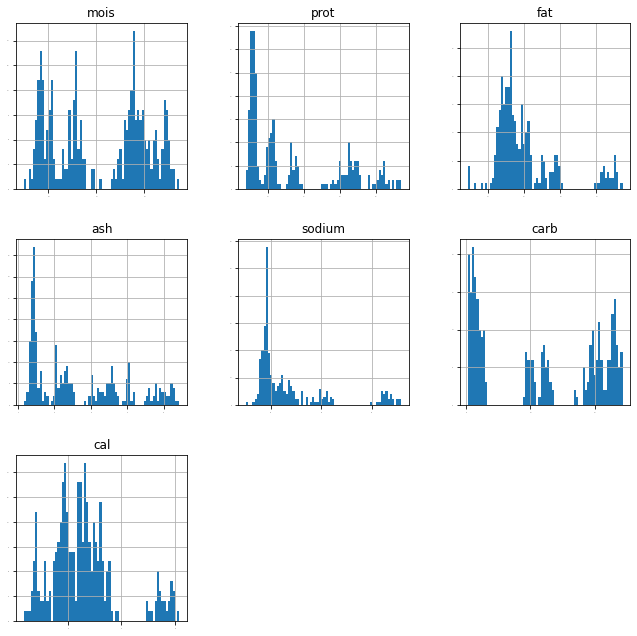

In [8]:
df.set_index('id', inplace=True)
df_desc = df.iloc[:, :1]
# df_desc["brand"] = pd.to_numeric(df_desc['brand'], errors='coerce')
df.drop(df.columns[:1].values, axis=1, inplace=True)

ax = df.hist(bins=70, xlabelsize=-1, ylabelsize=-1, figsize=(11,11))
# df.columns

### Data's distribution looks good. Some of them are skewed distributions, other ones are bi or tri modal distribution.

### Implement PCA

In [11]:
from scipy.stats import boxcox
df_TF2 = pd.DataFrame(index=df.index)
for i in (df.columns.values):
    df_TF2["%s_TF2" % i] = (boxcox(df.loc[:, i])[0])

    
df_TF2 = StandardScaler().fit_transform(df)

print("mean: ", np.round(df_TF2.mean(), 2))
print("standard dev: ", df_TF2.std())

fit = PCA()
pca = fit.fit_transform(df_TF2)

mean:  -0.0
standard dev:  1.0


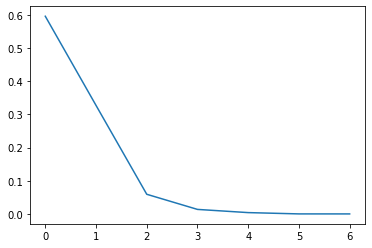

In [12]:
plt.plot(fit.explained_variance_ratio_)

In [13]:
print(fit.explained_variance_ratio_)
print(fit.explained_variance_ratio_[:3].sum())

[5.95968842e-01 3.27208198e-01 5.92231918e-02 1.35963182e-02
 3.95385973e-03 4.82299078e-05 1.35982576e-06]
0.9824002323541896


### First three eigenvectors account for >95% of the variance

In [14]:
pca = pd.DataFrame(pca[:, :3], index=df.index)
pca = pca.join(df_desc)
pca.rename(columns={0:'c1',1:'c2',2:'c3'}, inplace=True)

In [15]:
np.round(pca.corr(), 3)
## orthogonal vectors

,c1,c2,c3
c1,1.000,-0.020,0.008
c2,-0.020,1.000,-0.012
c3,0.008,-0.012,1.000


### Analysis

#### Component one
Foods that are high in ash, fat and sodium. It could be processed food, due to high concentration of fats, and salt.

In [16]:
vects = fit.components_[:3]
one = pd.Series(vects[0], index=df.columns)
one.sort_values(ascending=False)

ash       0.471890
fat       0.446666
sodium    0.435703
prot      0.378761
cal       0.244487
mois      0.064709
carb     -0.424914
dtype: float64

In [17]:
two = pd.Series(vects[1], index=df.columns)
two.sort_values(ascending=False)

cal       0.567458
carb      0.320312
fat       0.234379
sodium    0.201662
ash      -0.110990
prot     -0.269707
mois     -0.628276
dtype: float64

In [18]:
three = pd.Series(vects[2], index=df.columns)
three.sort_values(ascending=False)

prot      0.746027
cal       0.113316
ash       0.056273
carb      0.052237
fat      -0.199309
mois     -0.421669
sodium   -0.455169
dtype: float64

In [19]:
pca.sort_values(by='c1')['brand'][:500].value_counts()

J    36
H    35
E    34
D    33
B    32
F    32
C    29
A    29
I    29
G    29
Name: brand, dtype: int64

In [20]:
pca.sort_values(by='c2')['brand'][:500].value_counts()

J    36
H    35
E    34
D    33
B    32
F    32
C    29
A    29
I    29
G    29
Name: brand, dtype: int64

In [21]:
pca.sort_values(by='c3')['brand'][:500].value_counts()

J    36
H    35
E    34
D    33
B    32
F    32
C    29
A    29
I    29
G    29
Name: brand, dtype: int64

### Conclusion
Pizza J has the best combination of nutritients. However, it is important to notice that we measured nutritients numerically, whereas in real life, for example, high percentage of fat or ashes in not good.